In [ ]:
import pickle
import numpy as np
import tensorflow as tf

In [ ]:
with open('./X_train.pkl', 'rb')as file:
    X_train = pickle.load(file)
with open('./y_train.pkl', 'rb')as file:
    y= pickle.load(file)
SIZE = 128

In [ ]:
X = np.reshape(X_train, (len(X_train), SIZE, SIZE, 1))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=150, random_state=42)

In [ ]:
from keras.utils import to_categorical

# Convert integer labels to one-hot encoded format
y_train = to_categorical(y_train, num_classes=3)

In [ ]:
from tensorflow.keras import layers, models
model = tf.keras.models.Sequential([layers.InputLayer(input_shape=[SIZE,SIZE, 1]),

    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(50,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dropout(rate=0.5),
    layers.Dense(100, activation='relu'),

    layers.Dense(3, activation='softmax'),])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 63, 63, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 30, 30, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 28, 28, 50)        28850     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 14, 14, 50)       

In [ ]:
# early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', verbose=1, patience=10, restore_best_weights=True)
history = model.fit(
    x = X_train,
    y=y_train,
    validation_split=0.05,
    batch_size=32,
    epochs=100#,
    #callbacks=early_stopping
  )

Epoch 1/100
35/35 [==============================] - 4s 54ms/step - loss: 2.7200 - accuracy: 0.3369 - val_loss: 1.0742 - val_accuracy: 0.3390
Epoch 2/100
35/35 [==============================] - 1s 16ms/step - loss: 1.1013 - accuracy: 0.3684 - val_loss: 1.0982 - val_accuracy: 0.3559
Epoch 3/100
35/35 [==============================] - 1s 17ms/step - loss: 1.0941 - accuracy: 0.3702 - val_loss: 1.0877 - val_accuracy: 0.4068
Epoch 4/100
35/35 [==============================] - 1s 19ms/step - loss: 1.0765 - accuracy: 0.4232 - val_loss: 1.0526 - val_accuracy: 0.4746
Epoch 5/100
35/35 [==============================] - 1s 18ms/step - loss: 1.0618 - accuracy: 0.4322 - val_loss: 1.0751 - val_accuracy: 0.4068
Epoch 6/100
35/35 [==============================] - 1s 17ms/step - loss: 1.0828 - accuracy: 0.3944 - val_loss: 1.0923 - val_accuracy: 0.4068
Epoch 7/100
35/35 [==============================] - 1s 18ms/step - loss: 1.0652 - accuracy: 0.3998 - val_loss: 1.1955 - val_accuracy: 0.4237
Epoch 

In [ ]:
import numpy as np
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
print(y_pred)

5/5 [==============================] - 0s 62ms/step
[0 0 2 2 0 0 2 1 0 2 1 0 2 2 0 1 1 2 2 0 2 1 0 2 1 0 2 0 2 2 0 2 2 2 1 1 2
 0 2 2 0 2 2 0 0 1 1 0 2 2 0 0 1 0 2 1 0 2 2 0 0 0 1 0 1 0 0 0 0 1 0 2 2 1
 1 0 2 2 0 0 0 0 1 0 1 0 2 1 0 1 0 1 2 0 2 1 1 1 0 0 2 1 2 2 1 2 2 0 0 0 0
 1 1 1 2 0 0 2 1 0 0 2 2 0 2 0 2 0 0 2 1 0 0 2 2 0 2 0 0 1 2 2 2 2 1 1 1 0
 1 2]


In [ ]:
y_test

array([0, 0, 2, 2, 2, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 1, 2, 1, 2, 0, 1, 1,
       0, 2, 2, 0, 2, 2, 1, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 1, 0, 2,
       2, 2, 1, 2, 2, 0, 0, 0, 1, 0, 2, 1, 1, 2, 2, 2, 0, 0, 0, 1, 0, 2,
       1, 0, 0, 0, 0, 0, 1, 1, 2, 0, 2, 2, 1, 0, 2, 2, 2, 0, 0, 0, 2, 1,
       2, 0, 0, 0, 2, 1, 2, 0, 1, 2, 0, 0, 2, 1, 0, 2, 0, 0, 2, 0, 1, 0,
       0, 1, 1, 1, 2, 0, 2, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 2, 2, 2, 0, 0, 0, 1, 0, 1, 1, 0, 2, 1])

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
cr = classification_report(y_test, y_pred)
print(cm)
print(acc)
print(cr)

[[39 11 16]
 [ 6 17 12]
 [15  9 25]]
0.54
              precision    recall  f1-score   support

           0       0.65      0.59      0.62        66
           1       0.46      0.49      0.47        35
           2       0.47      0.51      0.49        49

    accuracy                           0.54       150
   macro avg       0.53      0.53      0.53       150
weighted avg       0.55      0.54      0.54       150



In [ ]:
labels = {'Healthy':0, 'Powdery':1, 'Rusty':2}

In [ ]:
labels

{'Healthy': 0, 'Powdery': 1, 'Rusty': 2}

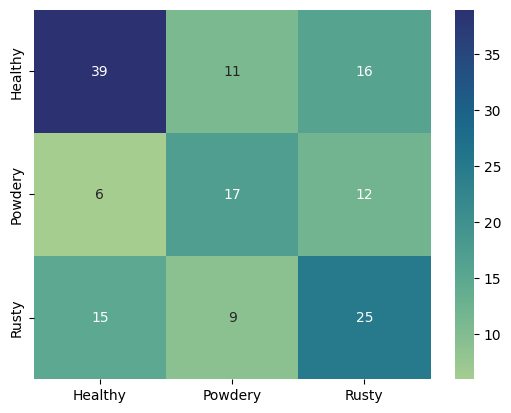

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, cmap = 'crest', xticklabels=labels, yticklabels=labels)
plt.show()

0


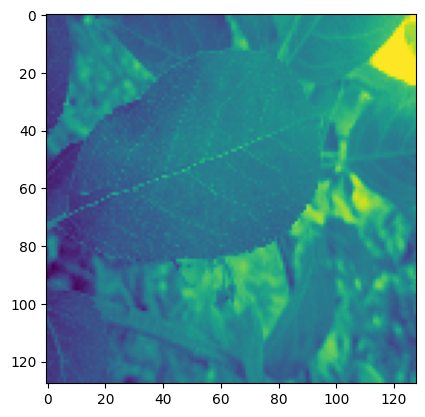

In [ ]:
import random
import matplotlib.pyplot as plt

X_val = X_test
n=random.randint(0, X_val.shape[0]-1) #Select the index of image to be loaded for testing
img = X_val[n]
print(y_test[n])
plt.imshow(img)